# The harmonic oscillator

In this tutorial, we will look at the harmonic oscillator, a simple system that is often used to introduce the concepts of quantum mechanics.

We install and import comfit. 

In [8]:
import sys
from pathlib import Path
current_dir = Path().resolve()
parent_dir = current_dir.parent
sys.path.append(str(parent_dir))
import comfit as cf
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

We will create a one dimensional system with a harmonic potential. 

In [15]:
qm = cf.QuantumMechanics(1,xlim=[-15,15],xRes=200)

In [16]:
omega = 0.2

In [17]:
qm.V_ext = 1/2*omega**2*qm.x**2

The ground state is given by 

$$
\psi_0(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{1/4} e^{-\frac{m\omega x^2}{2\hbar}}
$$

Let's initiate that wave function. 

In [18]:
qm.psi = (omega/np.pi)**(1/4)*np.exp(-omega*qm.x**2/2)
qm.psi_f = sp.fft.fftn(qm.psi)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$'>)

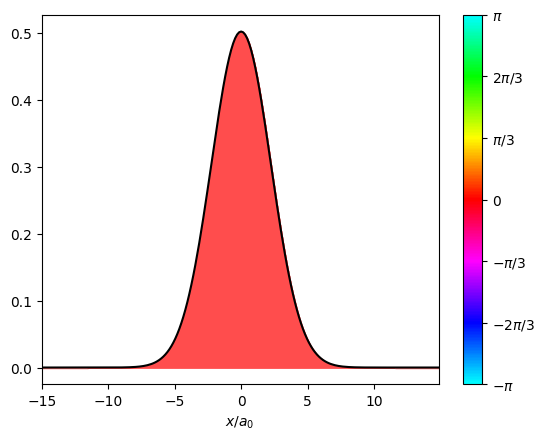

In [19]:
qm.plot_complex_field(qm.psi)

Evolve this for $T=15$. 

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$'>)

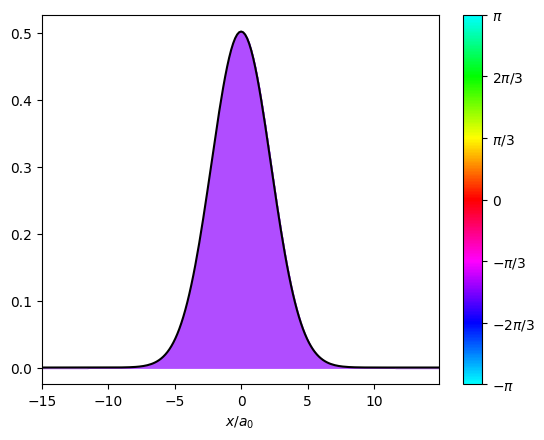

In [20]:
qm.evolve_schrodinger(150)
qm.plot_complex_field(qm.psi)

Make an animation

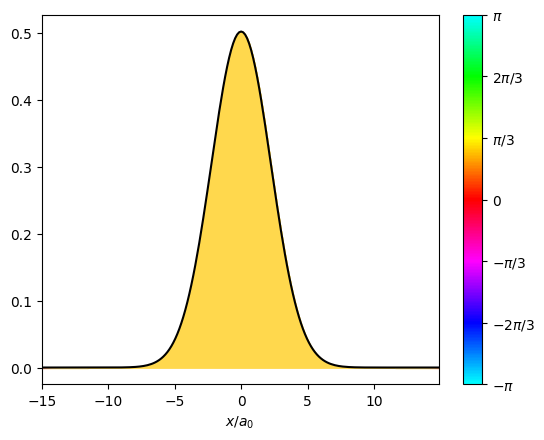

In [22]:
for n in range(100):
    qm.evolve_schrodinger(10)
    qm.plot_complex_field(qm.psi)
    cf.tool_save_plot(n)
cf.tool_make_animation_gif(n)

The higher states can be generated by acting on the ground state with the operator $a^\dagger$, which in the position representation is given by

$$
\sqrt{\frac{m\omega}{2\hbar}}\left(x - \frac{\hbar}{m\omega}\frac{d}{dx}\right)
$$

let's generate the first excited state. 

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$'>)

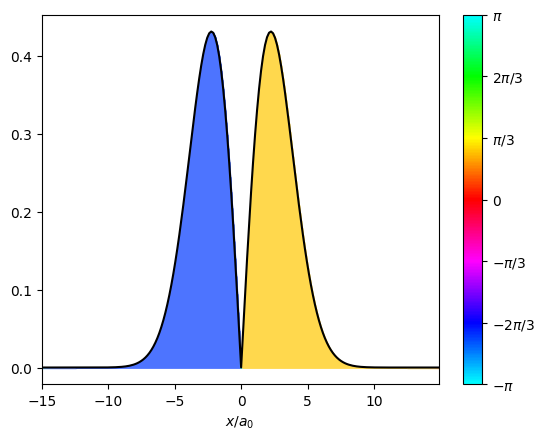

In [24]:
def a_dag(qm,psi,psi_f):
    new_psi = qm.x*psi - 1/omega*sp.fft.ifftn(qm.dif[0]*psi_f)
    new_psi = np.sqrt(omega/2)*new_psi
    return new_psi

qm.psi = a_dag(qm,qm.psi,qm.psi_f)
qm.psi_f = sp.fft.fftn(qm.psi)

qm.plot_complex_field(qm.psi)


And the next excited state.

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$'>)

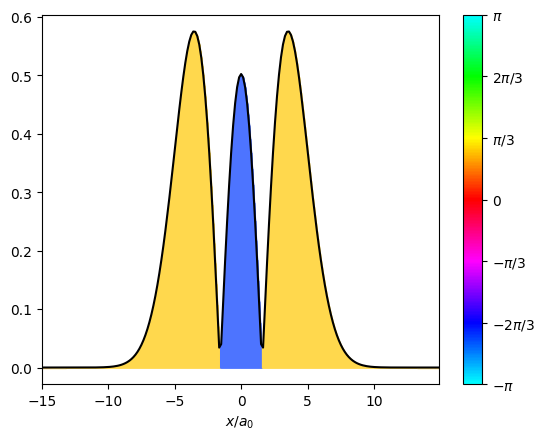

In [25]:
qm.psi = a_dag(qm,qm.psi,qm.psi_f)
qm.psi_f = sp.fft.fftn(qm.psi)

qm.plot_complex_field(qm.psi)

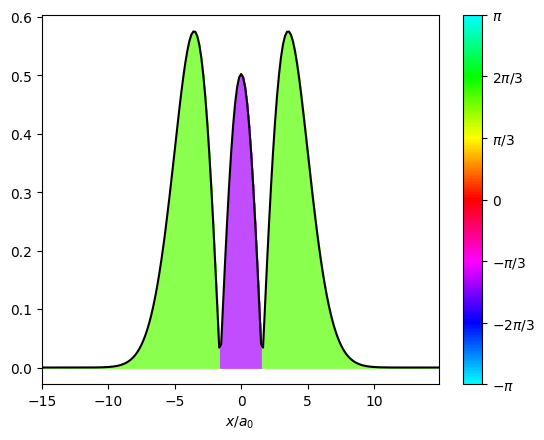

In [28]:
for n in range(100):
    qm.evolve_schrodinger(3)
    qm.plot_complex_field(qm.psi)
    cf.tool_save_plot(n)
cf.tool_make_animation_gif(n)